In [2]:
import pandas as pd
import numpy as np

filePath = "data/auto-mpg.data"
columnNames = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

# reading dataset into dataFrame
df = pd.read_csv(filePath, delim_whitespace=True, names=columnNames)
# removing cylindres and car_name
df = df.drop("cylinders", axis=1)
df = df.drop("car_name", axis=1)
# replacing ? with NaN to ensure it's recognized as a missing value
df['horsepower'] = df['horsepower'].replace('?', np.nan)
# removing rows with missing values
df = df.dropna()
# Handling Origin (a categorical atribute)
df = pd.get_dummies(df, columns=['origin'], prefix=['origin'], drop_first=True, dtype=int)
df = df.rename(columns={'origin_2': 'origin_1', 'origin_3': 'origin_2'})
df = df[["mpg", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin_2", "origin_1"]]

# converting horsepower column to float
df['horsepower'] = df['horsepower'].astype(float)

df.head()


,mpg,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_1
0,18.0,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0


In [3]:
from sklearn.model_selection import train_test_split
# Splitting the dataset on test and train data
X = df[['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_2', 'origin_1']]
y = df['mpg']


# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Adding a column of ones to X (for my linear regression implementation)
X_train_ones = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_ones = np.c_[np.ones(X_test.shape[0]), X_test]

In [4]:
import numpy as np
# Implementing Linear Regression
# Betas = (X^T X)^-1 X^T y 

my_linear_regression = np.dot(np.dot(np.linalg.inv(np.dot(X_train_ones.T, X_train_ones)), X_train_ones.T), y_train)


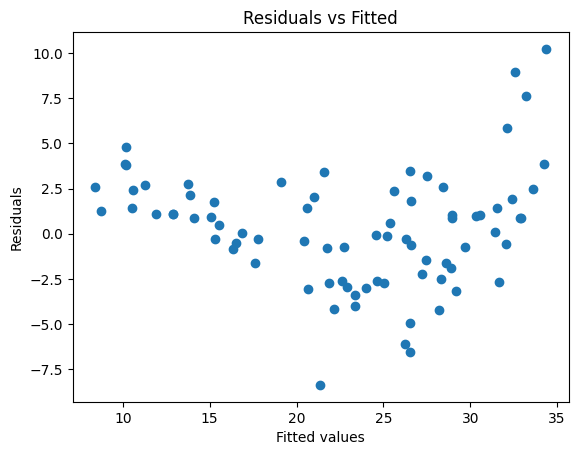

In [5]:
# testing my linear regression and plotting the residuals

y_predictions = np.dot(X_test_ones, my_linear_regression)

residuals = []
y_test_array = np.asarray(y_test)
for i in range(0, len(y_test_array)):
    residuals.append(y_test_array[i] - y_predictions[i])

# plotting the residuals
import matplotlib.pyplot as plt

plt.scatter(y_predictions, residuals, marker='o')
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.title("Residuals vs Fitted")
plt.show()

In [6]:
# Comparing my linear regression and sci-kit linear regression (betas, predictions?, R^2, MSE, MAE)
from sklearn.linear_model import LinearRegression

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X_train, y_train)

y_predictions_sk = sk_linear_regression.predict(X_test)

# Comparing the betas
betas_sk = np.insert(sk_linear_regression.coef_, 0, sk_linear_regression.intercept_)
for i in range(0, len(betas_sk)):
    print(f"Razlika beta {i}: {np.abs(my_linear_regression[i] - betas_sk[i])}")


Razlika beta 0: 1.4029666317583178e-11
Razlika beta 1: 4.265685027426969e-15
Razlika beta 2: 8.999745393367675e-15
Razlika beta 3: 4.761815941556335e-16
Razlika beta 4: 1.1965428647897625e-13
Razlika beta 5: 1.3877787807814457e-13
Razlika beta 6: 2.0339285811132868e-13
Razlika beta 7: 3.5793590313915047e-13


In [7]:
# Comparing the MSE (od ena do n sestejemo kvadrate napak med y_test in y_predicitons)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predictions)
mse_sk = mean_squared_error(y_test, y_predictions_sk)
print(f"My MSE:      {mse}\nSkLearn MSE: {mse_sk}\nDifference:  {np.abs(mse-mse_sk)}")
print(f"SkLearn better: {mse_sk < mse}")

My MSE:      10.173951170813487
SkLearn MSE: 10.173951170812881
Difference:  6.057376822354854e-13
SkLearn better: True


In [8]:
# Comparing the MAE (od ena do n sestejemo absolutne vrednosti napak med y_test in y_predictions)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predictions)
mae_sk = mean_absolute_error(y_test, y_predictions_sk)
print (f"My MAE:      {mae}\nSkLearn MAE: {mae_sk}\nDifference:  {np.abs(mae-mae_sk)}")
print(f"SkLearn better: {mae_sk < mae}")

My MAE:      2.425567583122693
SkLearn MAE: 2.4255675831225925
Difference:  1.0036416142611415e-13
SkLearn better: True


In [9]:
# Comparing the R-squared (R2 = 1 - (RSS / TSS))
# RSS (Residual Sum of Squares) - sum of squared differences between y_test and y_predictions
# TSS (Total Sum of Squares) - sum of squared differences between y_test and mean of y_test
# R2 med 0 in 1 (1 je boljsi, bolje napoveduje)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predictions)
r2_sk = r2_score(y_test, y_predictions_sk)
print (f"My R2:      {r2}\nSkLearn R2: {r2_sk}\nDifference: {np.abs(r2-r2_sk)}")
print(f"SkLearn better: {r2_sk > r2}")

My R2:      0.8363140594684193
SkLearn R2: 0.8363140594684291
Difference: 9.769962616701378e-15
SkLearn better: True
